In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft


(513,)


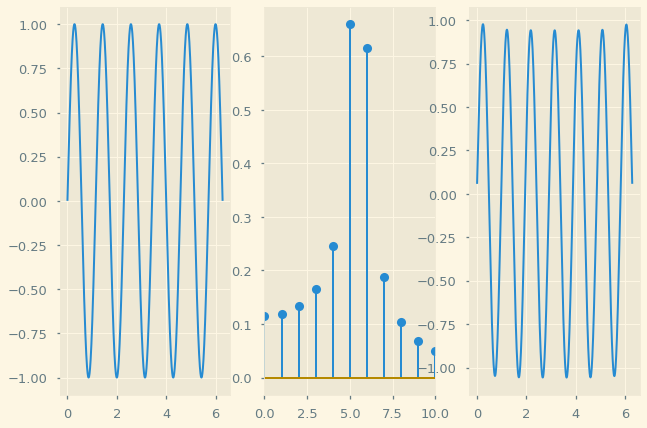

In [34]:
plt.style.use(['seaborn-talk', 'Solarize_Light2'])

t = np.linspace(0, 2*np.pi, 1024)

sig = np.sin(t * 5.5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(t, sig)

coeffs = fft.rfft(sig)

ax[1].stem(np.abs(coeffs) / 512)
ax[1].set_xlim((0, 10))

# The rfft produces fft_size / 2 + 1 coefficients
new_coeffs = np.insert(coeffs, 0, 0)[:513]
new_sig = fft.irfft(new_coeffs)

ax[2].plot(t,new_sig)

print(np.shape(new_coeffs))

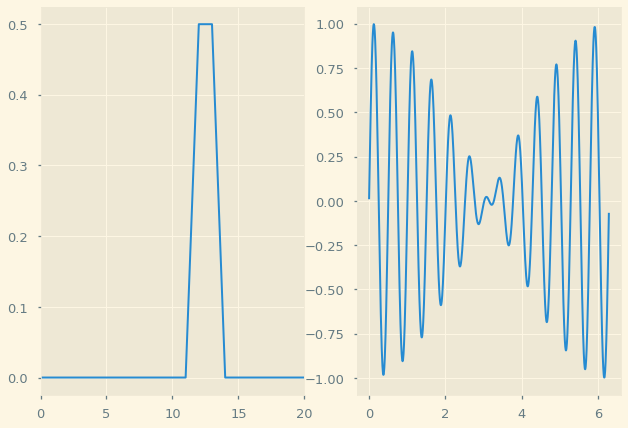

In [51]:
"""
We can see here that the result of trying to split a frequency component
between two bins is like the higher numbered bin with ampitude modulation by I guess a pi / N
cosine component.

Laroche and Dolson describe linear interpolation as a solution for shifted frequency components 
"in between" bins. But I can't see how 
"""

t = np.linspace(0, 2*np.pi, 1024)

sig = np.sin(t * 3)

coeffs = fft.rfft(sig)

new_coeffs = [0.0 + 0.0j for _ in range(len(coeffs))]

new_coeffs[12] = coeffs[3] * 0.5
new_coeffs[13] = coeffs[3] * 0.5

new_sig = fft.irfft(new_coeffs)

output_coeffs = fft.rfft(new_sig)

fig, ax = plt.subplots(1, 2)
ax[0].plot(np.abs(output_coeffs) / 512)
ax[0].set_xlim(0, 20)

ax[1].plot(t, new_sig)